In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [2]:
heart_disease = pd.read_csv('Heart_disease_statlog.csv')

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [4]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


In [5]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


- Age: idade dos pacientes em anos
- Sex: (Masculino: 1; Feminino: 0)
- cp: Tipo de dor torácica sentida pelo paciente. Este termo é categorizado em 4
    categorias.
    - 0 angina típica,
    - 1 angina atípica,
    - 2 dor não anginosa,
    - 3 assintomática
- trestbps: nível de pressão arterial do paciente no modo de repouso em mm/HG
- chol: colesterol sérico em mg/dl
- fbs: Níveis de açúcar no sangue em jejum > 120 mg/dl representa 1 em caso de
verdadeiro e 0 como falso (Nominal)
- restecg: O resultado do eletrocardiograma em repouso é representado em 3 valores
distintos
    - 0: Normal
    - 1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão
    do ST > 0,05 mV)
    - 2: mostrando provável ou definitiva hipertrofia ventricular esquerda por Critérios de
    Estes
- thalach: frequência cardíaca máxima alcançada
- exang: Angina induzida pelo exercício
    - 0 retratando Não
    - 1 retratando Sim
- oldpeak: Depressão do ST induzida pelo exercício em relação ao estado de repouso●
- slope: segmento ST medido em termos de inclinação durante o pico do exercício
    - 0: inclinação ascendente;
    - 1: plano;
    - 2: inclinação descendente
- ca: O número de vasos principais (0–3) (nominal)
- thal: Um distúrbio sanguíneo chamado talassemia
    - 0: NULO
    - 1: fluxo sanguíneo normal
    - 2: defeito fixo (sem fluxo sanguíneo em alguma parte do coração)
    - 3: defeito reversível (um fluxo sanguíneo é observado, mas não é normal (nominal)
- target: É a variável alvo que temos que prever 1 significa que o paciente sofre de
doença cardíaca e 0 significa que o paciente é normal.

In [6]:
heart_disease.describe(include=['object']) ## para as variaveis categoricas

ValueError: No objects to concatenate

In [7]:
datadict = pd.DataFrame(heart_disease.dtypes)
datadict.columns = ["Dtype"]
datadict['Valores_Nulos'] = heart_disease.isnull().sum()
datadict['%_Valores_Nulos'] = (heart_disease.isnull().sum() / heart_disease.shape[0]) * 100
datadict['NUnique']=heart_disease.nunique()

In [8]:
datadict

,Dtype,Valores_Nulos,%_Valores_Nulos,NUnique
age,int64,0,0.0,41
sex,int64,0,0.0,2
cp,int64,0,0.0,4
trestbps,int64,0,0.0,47
chol,int64,0,0.0,144
fbs,int64,0,0.0,2
restecg,int64,0,0.0,3
thalach,int64,0,0.0,90
exang,int64,0,0.0,2
oldpeak,float64,0,0.0,39


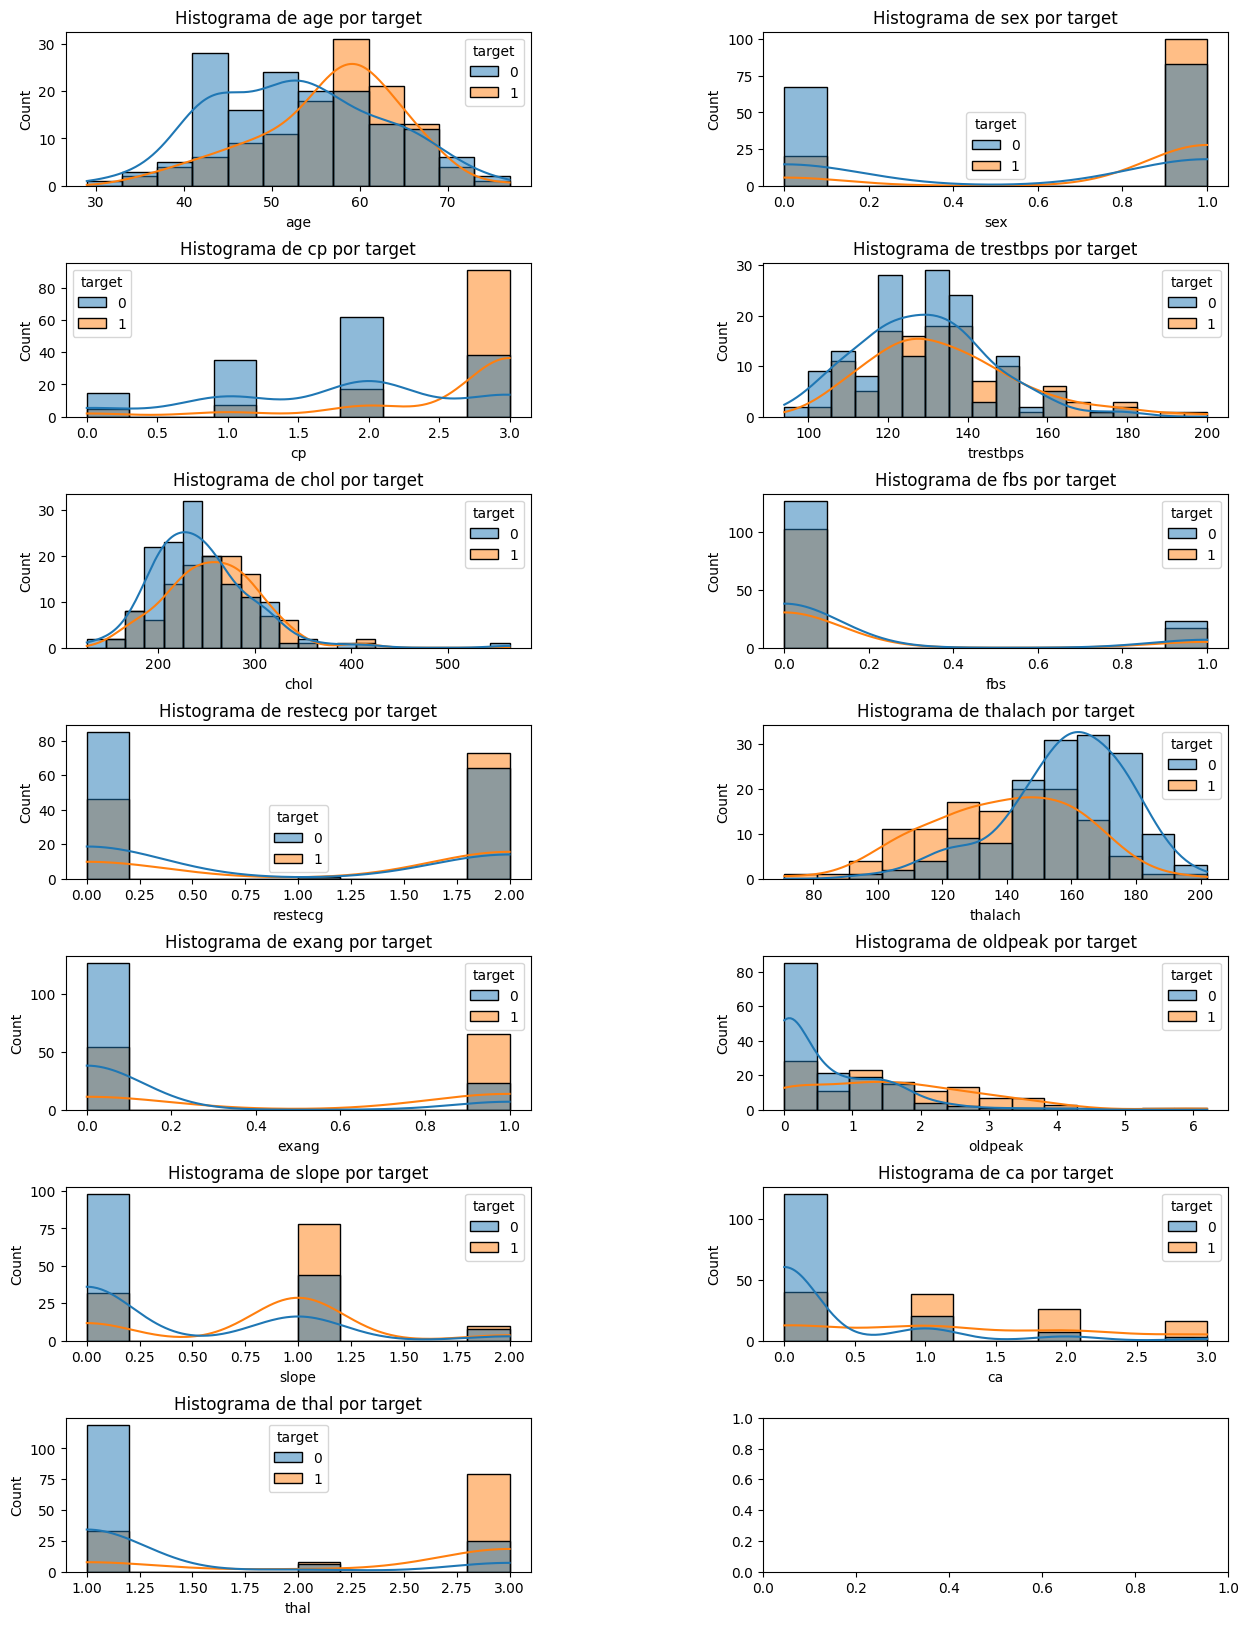

In [21]:
fig, ax = plt.subplots(7, 2, figsize=(15, 20))  # cria uma grade 7x2 de subplots
ax = ax.ravel()  # transforma a matriz 2D de subplots em uma array 1D para facilitar a iteração

for i, column in enumerate(heart_disease.drop('target', axis=1).columns):
    sns.histplot(heart_disease, x=column, hue='target', ax=ax[i], kde=True)
    ax[i].set_title(f'Histograma de {column} por target')
    ax[i].set_xlabel(column)
        

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # ajusta o espaçamento entre os subplots

Para a variável Age
- Ate os 50 anos de idade a maior parte das pessoas não sofrem ataque cardíaco, depois dos 60 ate 70 a maioria ja sofre.

Para a variável Sex:
- A maioria das mulheres(0) não sofrem de ataque cardíaco já para os homem a maioria sofre.

Para a variável Cp:
- A maioria dos pacientes são assintomáticos e são os que mais sofrem de ataque cardíaco. Ja para os outros tipos a maioria não sofre tanto.

Para a variável Trestbps:
- Para os que possuem a pressão arterial normal que é de ate 140, em sua maioria eles não sofrem de ataque cardíaco, ja para os que possuem pressão arterial maior que isso ja podemos percebem uma presença maior de casos de ataque cardíaco.

Para a variável Chol: 
- O nível de colesterol ideal é de ate 190, nos casos em que eles estao a 200 podemos ver que grande maioria não sofre com ataque cardíaco, ja quem possui valores mais elevados que isso em sua maioria sofrem com ataques cardíacos.

Para a variável FBS:
- Nos dois casos o nivel de sangue mesmo quando maior que o normal(1) apresentam que o ataque cardíaco não acontece.

Para a variável Restecg:
- Quem sofre de hipertrofia ventricular esquerda por Critérios de Estes (2) é mais provável de se ter ataques cardíacos.

Para a variável Thalach:
- Quem tem batimentos cardíacos normal que é de 60 a 100(ou proximos disso que no caso é ate 140) possui ataques cardíacos, agora quem consegue fazer mais que isso ja não sofre de ataques cardíacos.

Para a variável exang:
- Quem esta retratando sofre de ataque cardíaco.

Para a variável oldpeak:
- Quem sofre com valores ate 1 não sofrem mas quem tem valores superiores a isso sofrem de ataque cardíaco

Para a variável Slope:
- Quem tem inclinação de plano ou inclinação descendente é mais provável de sofrer de com ataques cardíacos.

Para a variável CA:
- Para aqueles que possuem número de vasos de 1 a 3 possuem mais chances de ter ataques cardíacos.

Para a variável Thal:
- Quem tem defeito físico(2) e defeito reversível(3) sofrem de ataque cardíaco

In [9]:
### seleciona variaveis numericas
num_df = heart_disease.select_dtypes(include=['float64', 'int64'])
## calcula a matriz de correlação
corr = num_df.corr()

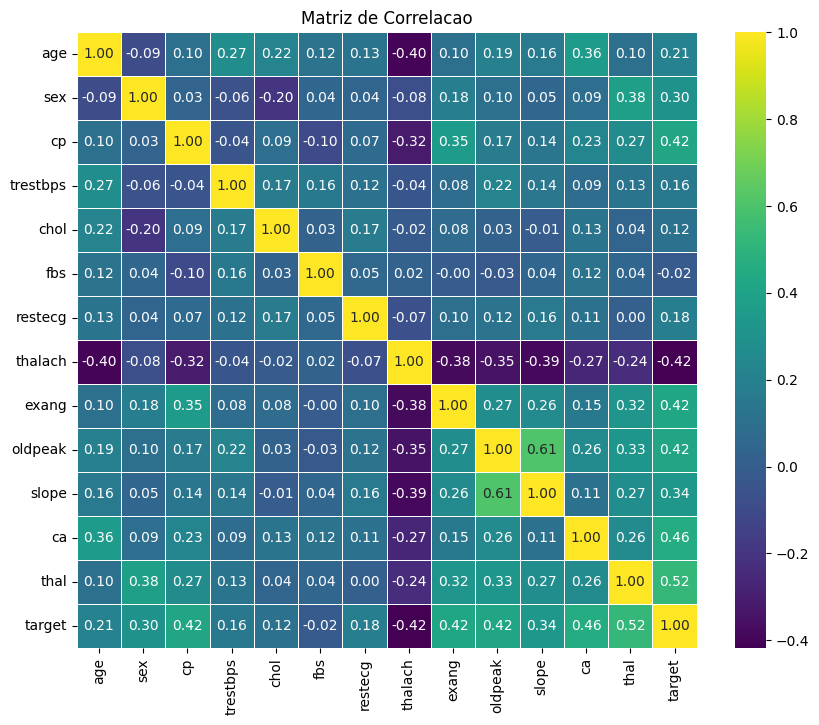

In [10]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacao')
plt.show()

- A Slope e a OldPeak são bem correlacionadas uma tem peso na putra.
- A exang com o CP
- A CA com a Age
- Sex com o Thal
- Thal com Exang
- Thal com o OldPeak


# 02

In [22]:
#### leitura dos pacotes

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

In [23]:
#### Cria vetores X e y com base nos dados
###### x contem as variaveis explicativas
X = heart_disease[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

###### y contem a variavel de interesse
y = heart_disease[[ 'target']]

In [24]:
###### vamos usar train_test split do pacote sklearn para a separacao dos dados deixando 80% treino 20% teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ## random_state para garantir a reprodutibilidade

# fit do modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [25]:
#### vamos agora aplicar o modelo fitado na base de test

y_pred = logreg.predict(X_test) ### aplicacao do modelo
y_pred_proba = logreg.predict_proba(X_test)[:, 1] ### previsao da probabilidade de ter sobrevivido ou nao

In [26]:
##### mostrnado o output
X_test["Previsao_Modelo"] = y_pred
X_test["Probabilidade_Sobreviver"] = y_pred_proba

In [27]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Previsao_Modelo,Probabilidade_Sobreviver
30,57,1,2,128,229,0,2,150,0,0.4,1,1,3,1,0.635152
116,46,1,3,120,249,0,2,144,0,0.8,0,0,3,1,0.675600
79,56,1,1,120,236,0,0,178,0,0.8,0,0,1,0,0.033098
127,52,0,2,136,196,0,2,169,0,0.1,1,0,1,0,0.059530
196,58,0,3,100,248,0,2,122,0,1.0,1,0,1,0,0.262742
137,56,1,3,125,249,1,2,144,1,1.2,1,1,1,1,0.640329
209,37,1,2,130,250,0,0,187,0,3.5,2,0,1,1,0.510509
45,58,1,2,140,211,1,2,165,0,0.0,0,0,1,0,0.050934
158,56,1,0,120,193,0,2,162,0,1.9,1,0,3,0,0.261989
247,65,0,2,155,269,0,0,148,0,0.8,0,0,1,0,0.076350


O algoritmo faz que se a probabilidade de ter ataque cardíaco for maior que 0.5 ai é provável que ele sofra(1) se for menor não(0)

### Performance do Modelo
Para calcular a performance do modelo, calculamos a matriz de precisão e vê as metricas de performance do modelo.

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

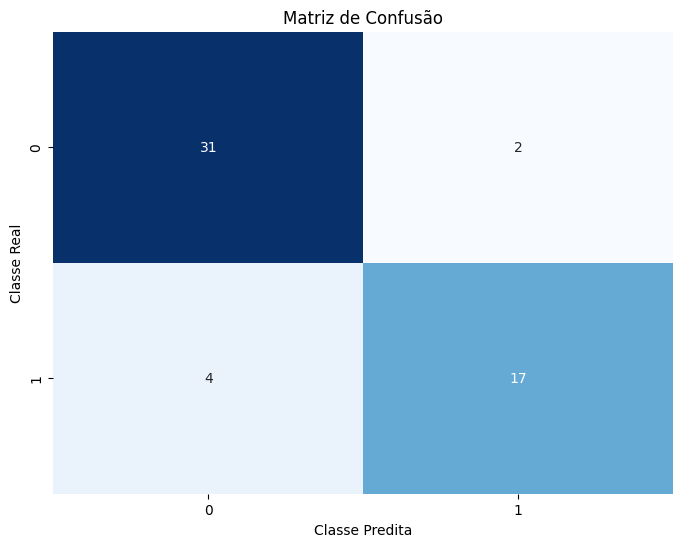

Acurácia: 0.8888888888888888
Precisão: 0.8947368421052632
Recall: 0.8095238095238095


In [29]:
# Calcular matriz de confusão
cm = confusion_matrix(y_test, y_pred) ## matriz de confusao, sendo o primeiro parametro a variavel real e o segundo a variavel prevista

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
## acuracia, precisao e recall, eles são metodos do pacote sklearn 


# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

# Obtendo as variáveis mais relevantes do modelo

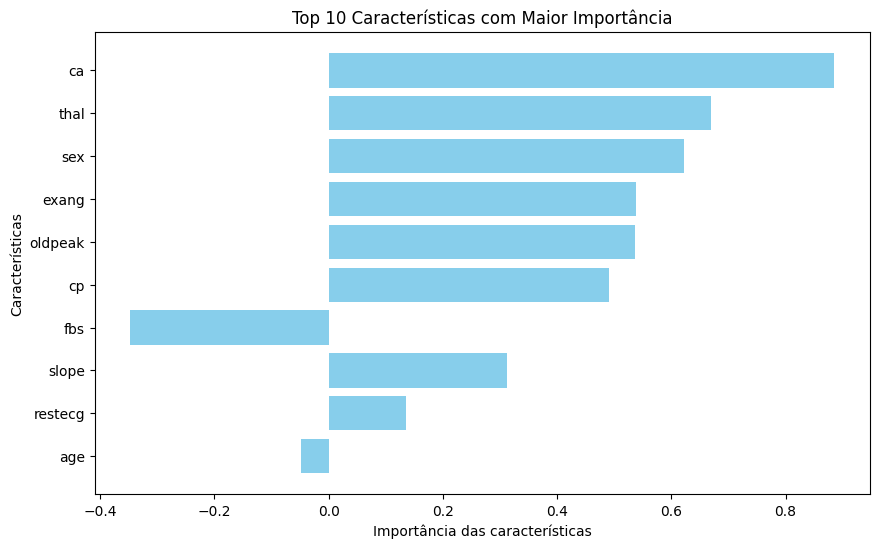

In [30]:
# Obtendo os coeficientes do modelo (importância das características)
coefficients = logreg.coef_[0]
feature_names = X.columns

# Ordenando os índices das características pelos coeficientes
indices = np.argsort(np.abs(coefficients))

# Top 10 características com maior importância
top_features = feature_names[indices][-10:]
top_importances = coefficients[indices][-10:]

# Plotando as top features com suas importâncias
plt.figure(figsize=(10,6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.title('Top 10 Características com Maior Importância')
plt.show()

In [31]:
# Criando um DataFrame para a tabela de regressão
regression_table = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenando as features pelos coeficientes em ordem decrescente
regression_table = regression_table.reindex(regression_table['Coefficient'].abs().sort_values(ascending=False).index)

# Exibindo a tabela
print(regression_table)

     Feature  Coefficient
11        ca     0.885451
12      thal     0.669340
1        sex     0.621329
8      exang     0.538542
9    oldpeak     0.537198
2         cp     0.491499
5        fbs    -0.347802
10     slope     0.311873
6    restecg     0.135875
0        age    -0.048871
7    thalach    -0.028890
3   trestbps     0.013522
4       chol     0.003372
